# COGS 189 Team Argus Motor Imaginery Classifier

## Section 1: Setup

In [1]:
# import libraries and packages
import numpy as np
import tqdm                                    # for dealing with data
from scipy.signal import butter, sosfiltfilt, sosfreqz  # for filtering
import matplotlib.pyplot as plt                         # for plotting
# define constants and dicts


In [4]:
def butter_bandpass(lowcut, highcut, fs, order = 2):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog = False, btype = 'band', output = 'sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order = 2):
        sos = butter_bandpass(lowcut, highcut, fs, order = order)
        y = sosfiltfilt(sos, data)
        return y

## Section 2: Data Import

define function for finding class type

In [2]:
def findtype(data, classnum):
    data1 = np.load(data)
    signal = data1['s']
    etype = data1['etyp']
    epos = data1['epos']
    edur = data1['edur']
    x = etype[etype == classnum]
    pa = epos[etype == classnum]
    pd = edur[etype == classnum]
    ps = pa + pd
    sigarr = []
    for i in range(len(pd)):
        sigarr.append(signal[pa[i]:ps[i]])
    finsigarr = np.stack(sigarr, axis= 0)
    
    return finsigarr

In [3]:
findtype('A01T.npz', 769).shape

(72, 313, 25)

In [5]:
# Create filtering variables
fs = 250.0     # 500 Hz sampling rate
lowcut = 0.5   # 0.1 Hz is the lowest frequency we will pass
highcut = 100.0 # 10  Hz is the highest frequency we will pass.

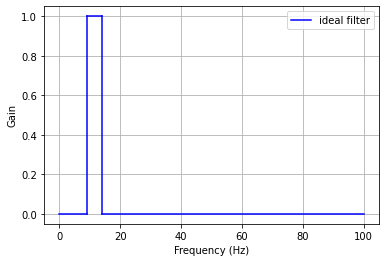

In [6]:
low_cut_temp  = 8;  
high_cut_temp = 15; 

# Plot an ideal filter 
plt.figure(0);
plt.clf();

# Draw out an ideal boxcar filter (you can ignore all of this code, just run it)
plt.plot([0.0,     low_cut_temp],  [0, 0], 'b-')
plt.plot([low_cut_temp,  low_cut_temp],  [0, 1], 'b-')
plt.plot([low_cut_temp,  high_cut_temp], [1, 1], 'b-')
plt.plot([high_cut_temp, high_cut_temp], [1, 0], 'b-')
plt.plot([high_cut_temp, 100.0],   [0, 0], 'b-', label="ideal filter")
plt.grid(True)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.legend(loc = 'best')

plt.show();

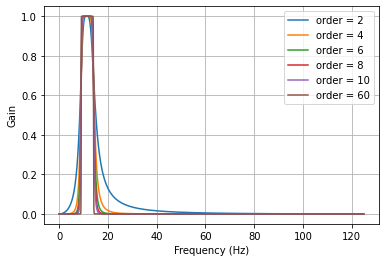

In [7]:
plt.figure(1)
plt.clf()

orders = [2, 4, 6, 8, 10, 60]; # -- Question 3 --

for order in orders:
    sos = butter_bandpass(low_cut_temp, high_cut_temp, fs, order = order)
    w, h = sosfreqz(sos, worN = 2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label = "order = %d" % order)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc = 'best')

plt.show();